In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [76]:
df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

In [77]:
# Convertir les dates au format datetime
df['created_at'] = pd.to_datetime(df['created_at'])


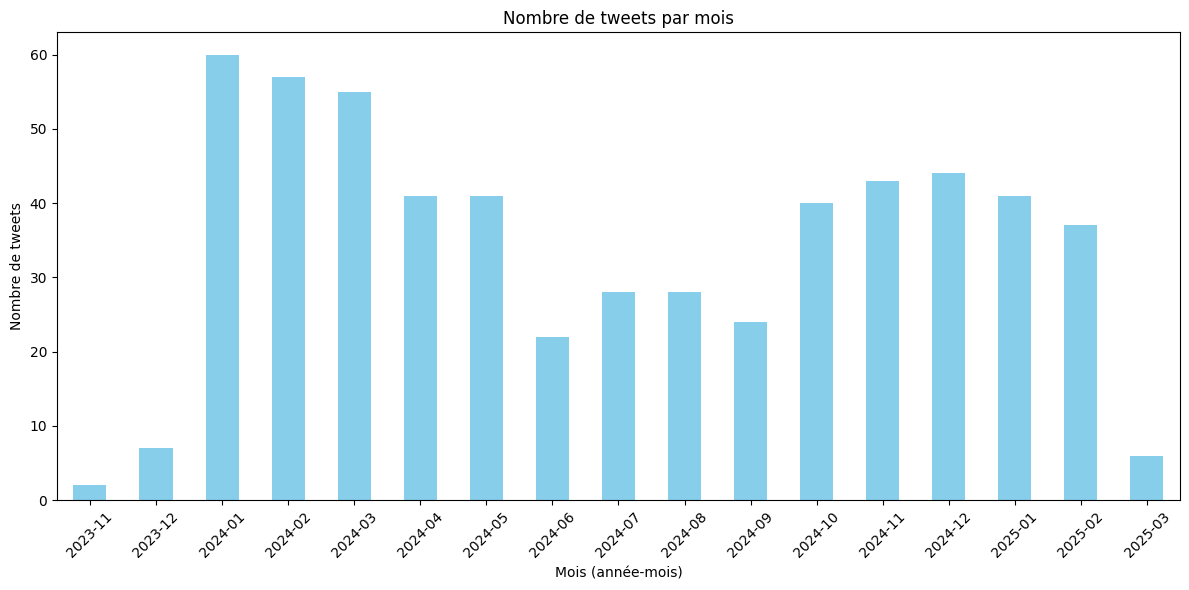

In [78]:
# Extraire l'année et le mois
df['month'] = df['created_at'].dt.to_period('M')

# Graphique des tweets par mois
tweets_par_mois = df.groupby('month')['id'].count()

plt.figure(figsize=(12,6))
tweets_par_mois.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par mois")
plt.xlabel("Mois (année-mois)")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


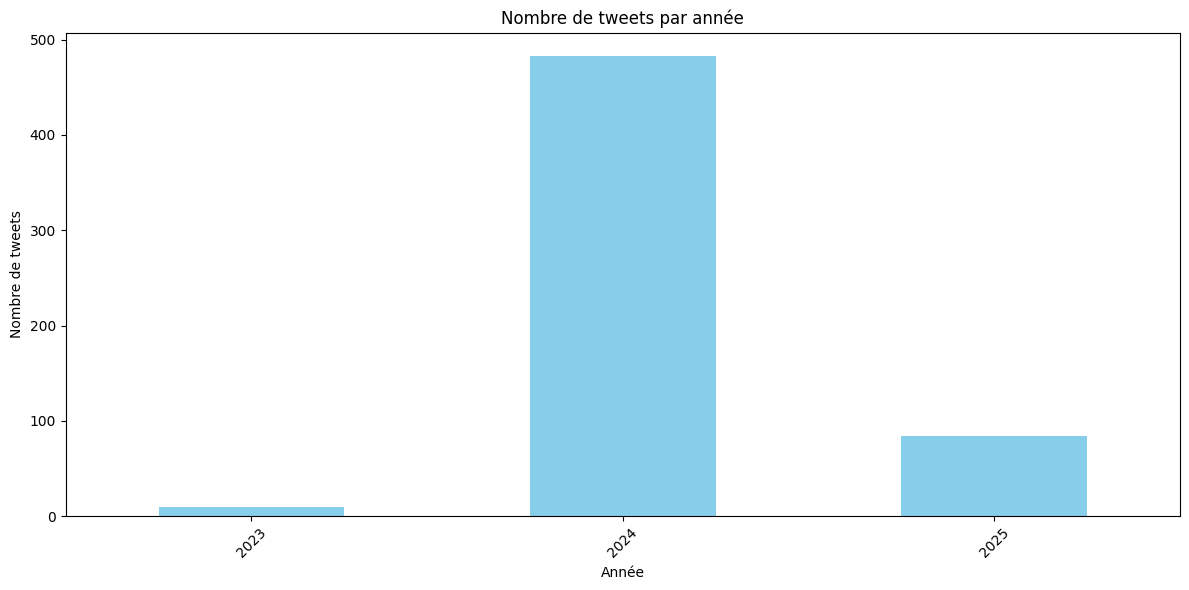

In [79]:
# Extraire l'année
df['year'] = df['created_at'].dt.year

# Graphique des tweets par année
tweets_par_annee = df.groupby('year')['id'].count()

plt.figure(figsize=(12,6))
tweets_par_annee.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par année")
plt.xlabel("Année")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


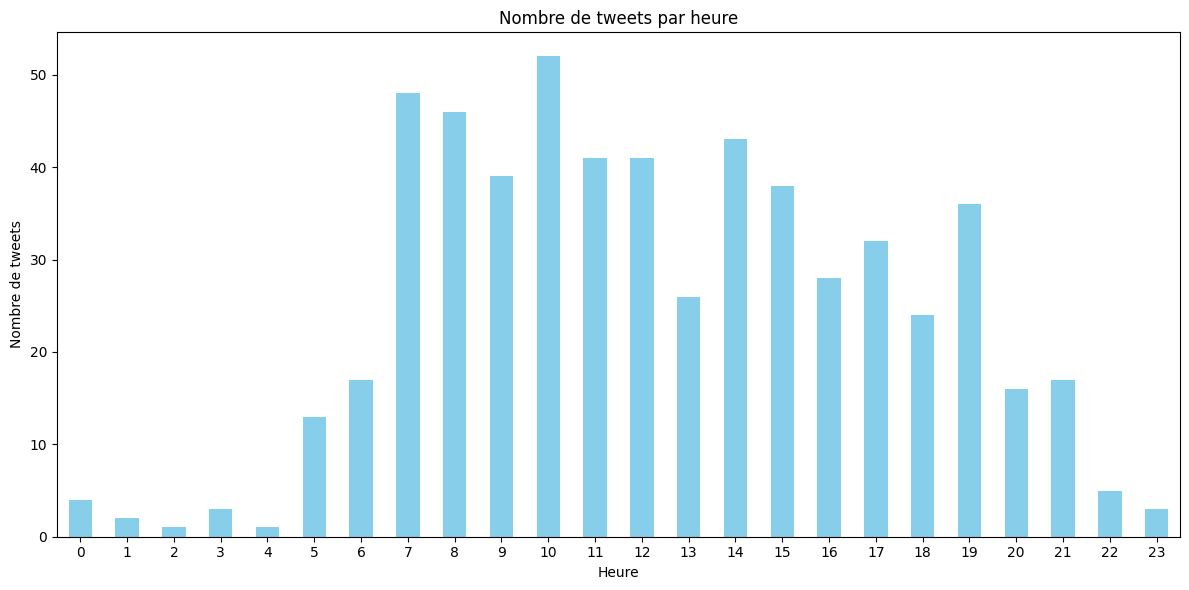

In [80]:
# Extraire l'heure de la publication du tweet
df['hour'] = df['created_at'].dt.hour

# Graphique des tweets par heure
tweets_par_heure = df.groupby('hour')['id'].count()

plt.figure(figsize=(12,6))
tweets_par_heure.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par heure")
plt.xlabel("Heure")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


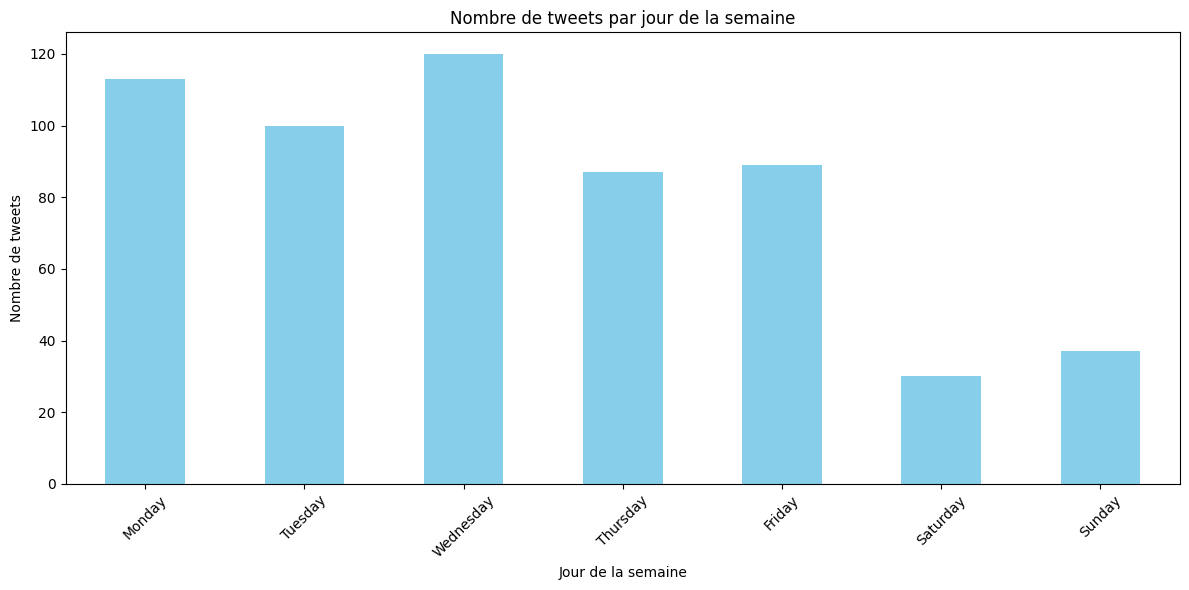

In [81]:
# Extraire le jour de la semaine
df['weekday'] = df['created_at'].dt.day_name()

# Graphique des tweets par jour de la semaine
tweets_par_jour_semaine = df.groupby('weekday')['id'].count()

# Réorganiser les jours de la semaine de manière chronologique
order_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tweets_par_jour_semaine = tweets_par_jour_semaine[order_days]

plt.figure(figsize=(12,6))
tweets_par_jour_semaine.plot(kind='bar', color='skyblue')
plt.title("Nombre de tweets par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


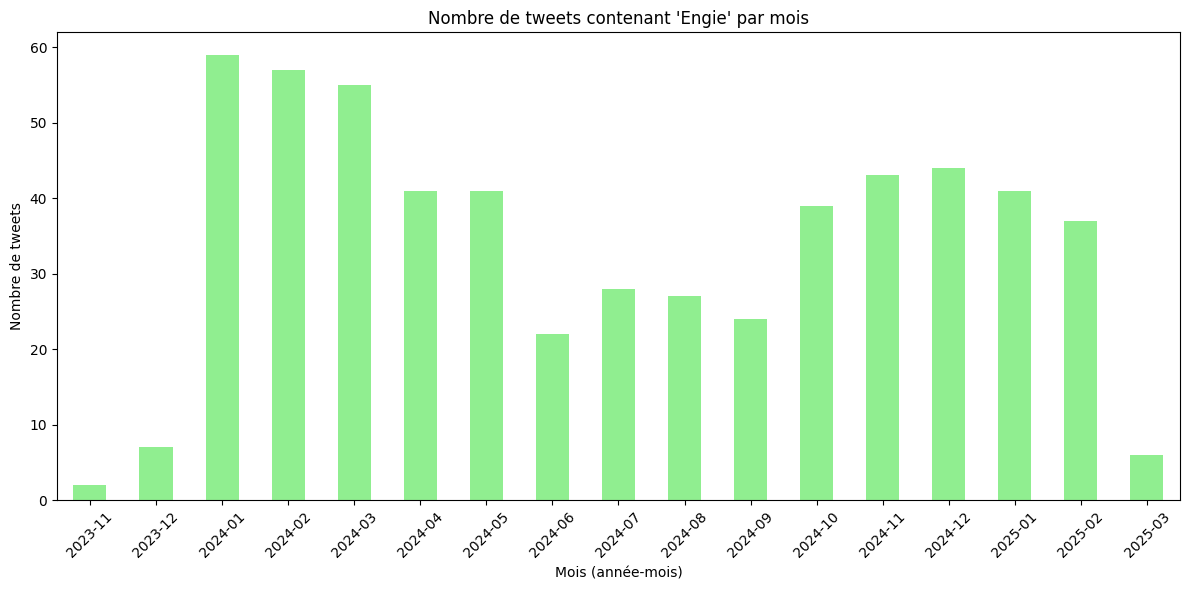

In [82]:
# Filtrer les tweets contenant le mot "Engie"
df_engie = df[df['full_text'].str.contains('Engie', case=False, na=False)]

# Graphique des tweets contenant "Engie" par mois
tweets_engie_par_mois = df_engie.groupby(df_engie['created_at'].dt.to_period('M'))['id'].count()

plt.figure(figsize=(12,6))
tweets_engie_par_mois.plot(kind='bar', color='lightgreen')
plt.title("Nombre de tweets contenant 'Engie' par mois")
plt.xlabel("Mois (année-mois)")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


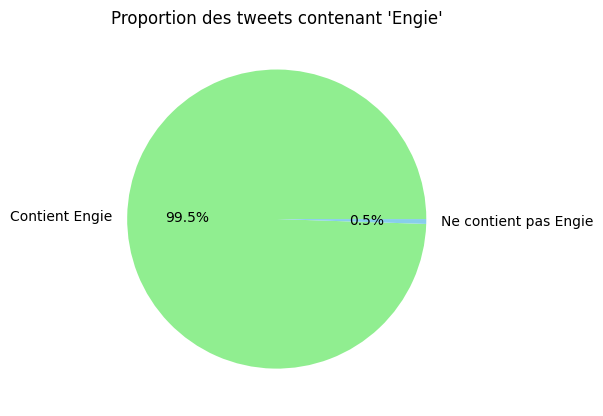

In [83]:
# Créer une colonne pour les tweets contenant "Engie"
df['contains_engie'] = df['full_text'].str.contains('Engie', case=False, na=False)

# Compter les tweets avec et sans "Engie"
tweets_engie_vs_non_engie = df['contains_engie'].value_counts()

plt.figure(figsize=(6,6))
tweets_engie_vs_non_engie.plot(kind='pie', labels=['Contient Engie', 'Ne contient pas Engie'], autopct='%1.1f%%', colors=['lightgreen', 'skyblue'])
plt.title("Proportion des tweets contenant 'Engie'")
plt.ylabel('')
plt.tight_layout()
plt.show()


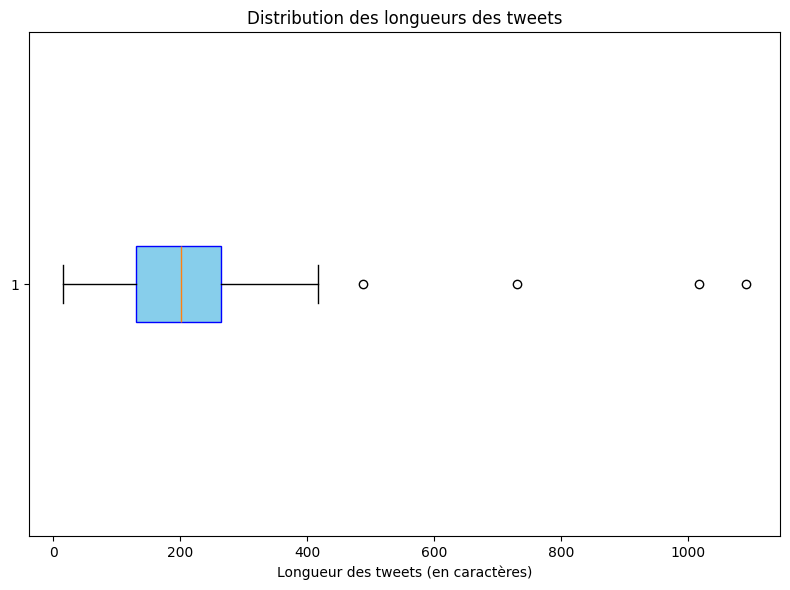

In [84]:
# Graphique en boîte de la longueur des tweets
plt.figure(figsize=(8,6))
plt.boxplot(df['text_length'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue', color='blue'))
plt.title("Distribution des longueurs des tweets")
plt.xlabel("Longueur des tweets (en caractères)")
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


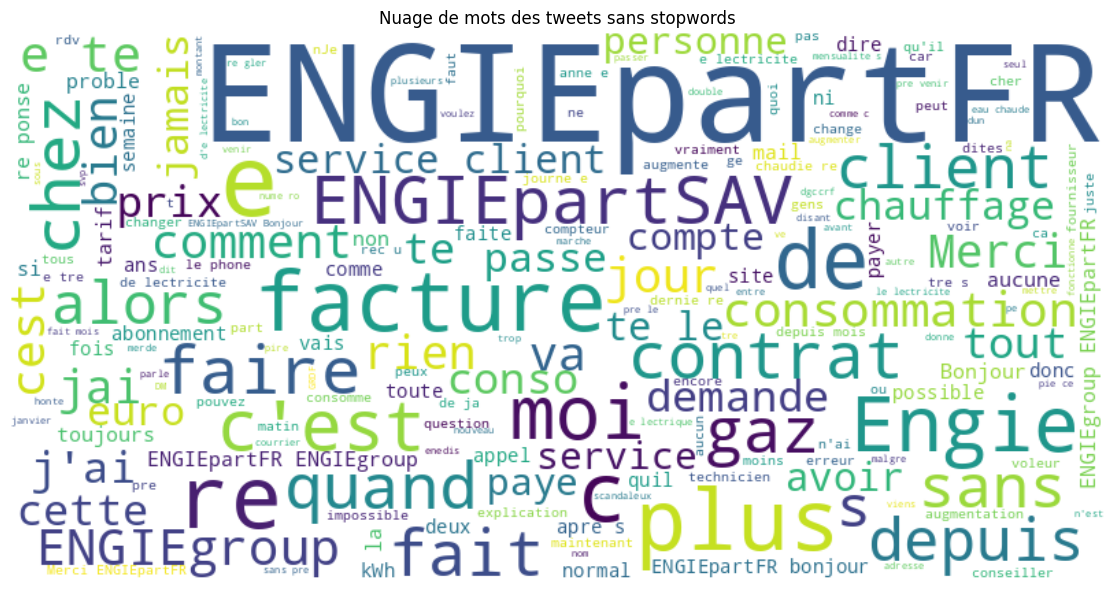

In [85]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

nltk.download('stopwords')

stop_words = set(stopwords.words('french'))

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

text_all_tweets = ' '.join(df['full_text'])

words = text_all_tweets.split()
filtered_text = ' '.join(word for word in words if word.lower() not in stop_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nuage de mots des tweets sans stopwords")
plt.tight_layout()
plt.show()

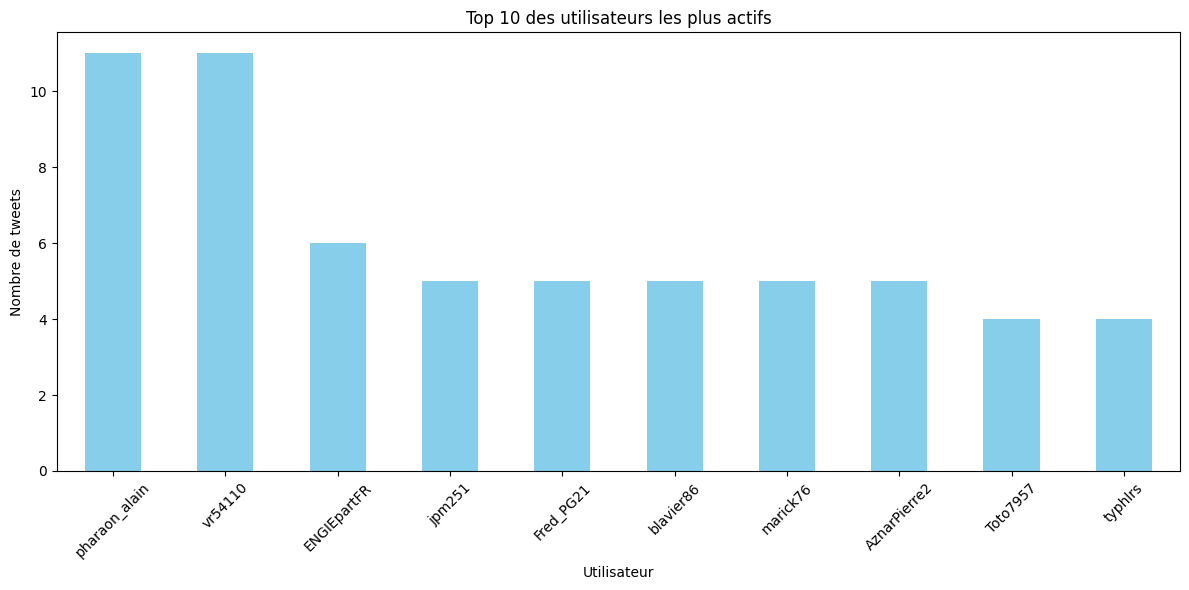

In [86]:
# Graphique du nombre de tweets par utilisateur
tweets_par_utilisateur = df['screen_name'].value_counts()

plt.figure(figsize=(12,6))
tweets_par_utilisateur.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 des utilisateurs les plus actifs")
plt.xlabel("Utilisateur")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## DATA ANALYSE

In [87]:

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

if df['created_at'].isnull().sum() > 0:
    print("Certaines dates n'ont pas pu être converties correctement.")

def assign_semester_and_season(month):
    if month in [1, 2, 3, 4]:
        season = "Hiver / Printemps"
        semester = "Semestre 1 (Janvier - Avril)"
    elif month in [5, 6, 7, 8]:
        season = "Printemps / Été"
        semester = "Semestre 2 (Mai - Août)"
    else:
        season = "Automne / Hiver"
        semester = "Semestre 3 (Septembre - Décembre)"
    return f"{semester} - Saison: {season}"

df['semestre_saison'] = df['created_at'].dt.month.apply(assign_semester_and_season)

df.to_csv('../Data/data_cleaned_with_analysis.csv', index=False)

print("Mise à jour terminée : colonne 'semestre_saison' avec des noms explicites et les saisons ajoutée.")


Mise à jour terminée : colonne 'semestre_saison' avec des noms explicites et les saisons ajoutée.


C:\Users\rakot\AppData\Local\Temp\ipykernel_36228\1938644449.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


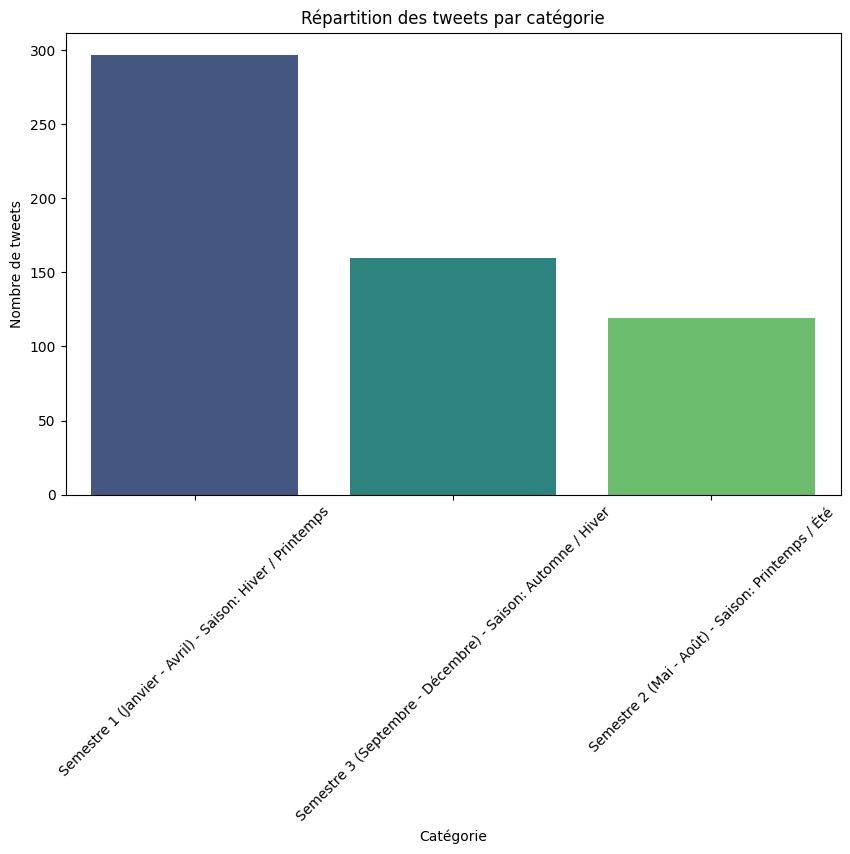

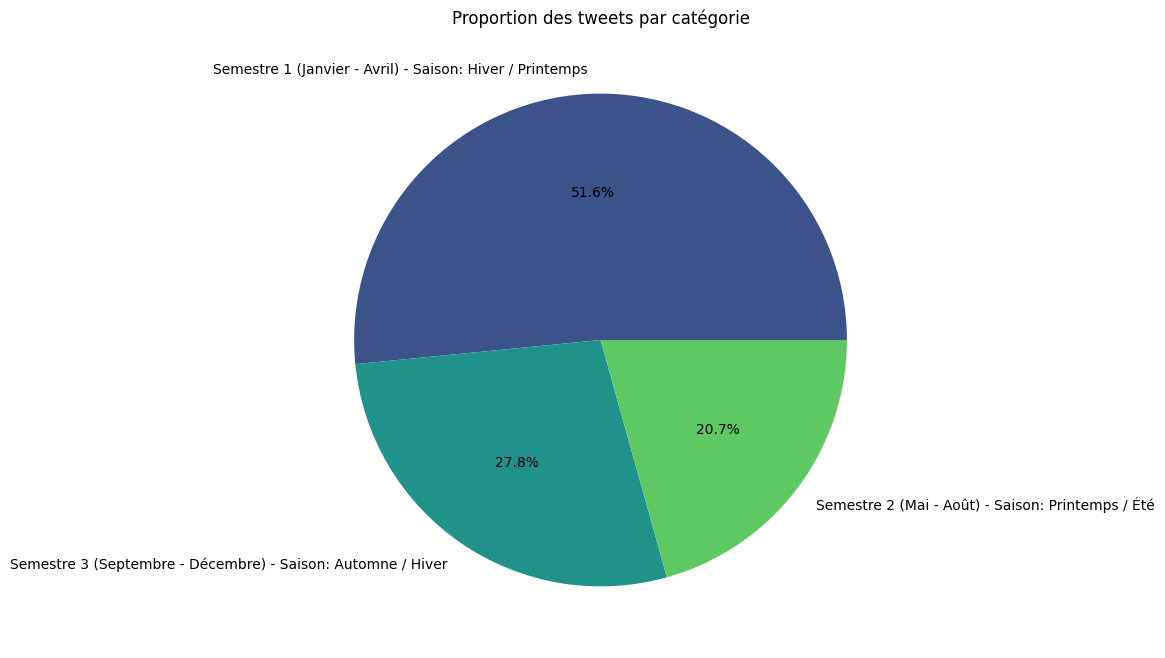

In [88]:

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

category_counts = df['semestre_saison'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel("Catégorie")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45)
plt.title("Répartition des tweets par catégorie")
plt.show()
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title("Proportion des tweets par catégorie")
plt.show()


C:\Users\rakot\AppData\Local\Temp\ipykernel_36228\2776734728.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['semestre_saison_année'] = df_filtered['semestre_saison'] + " - Année: " + df_filtered['year'].astype(str)
C:\Users\rakot\AppData\Local\Temp\ipykernel_36228\2776734728.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


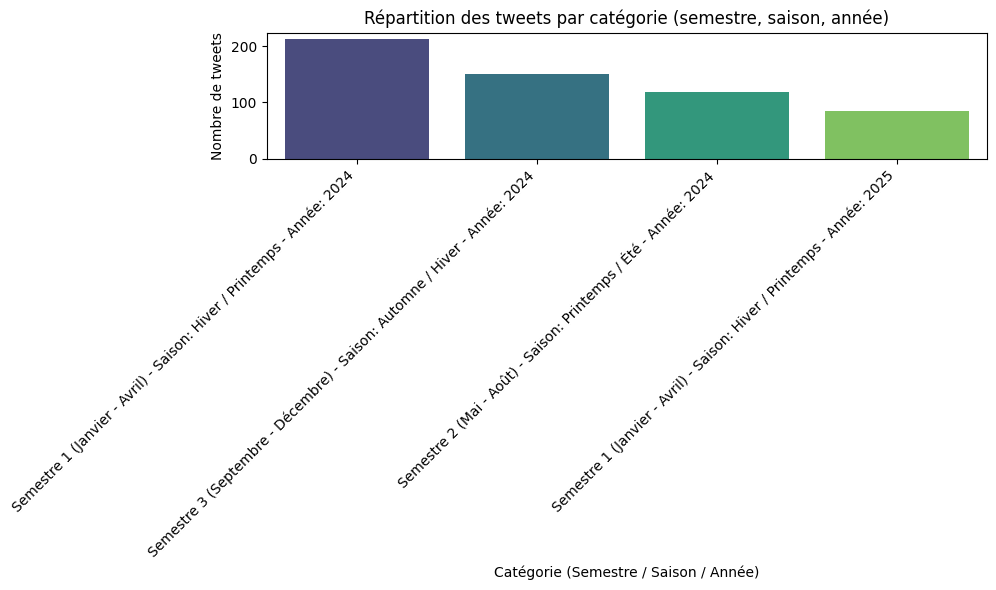

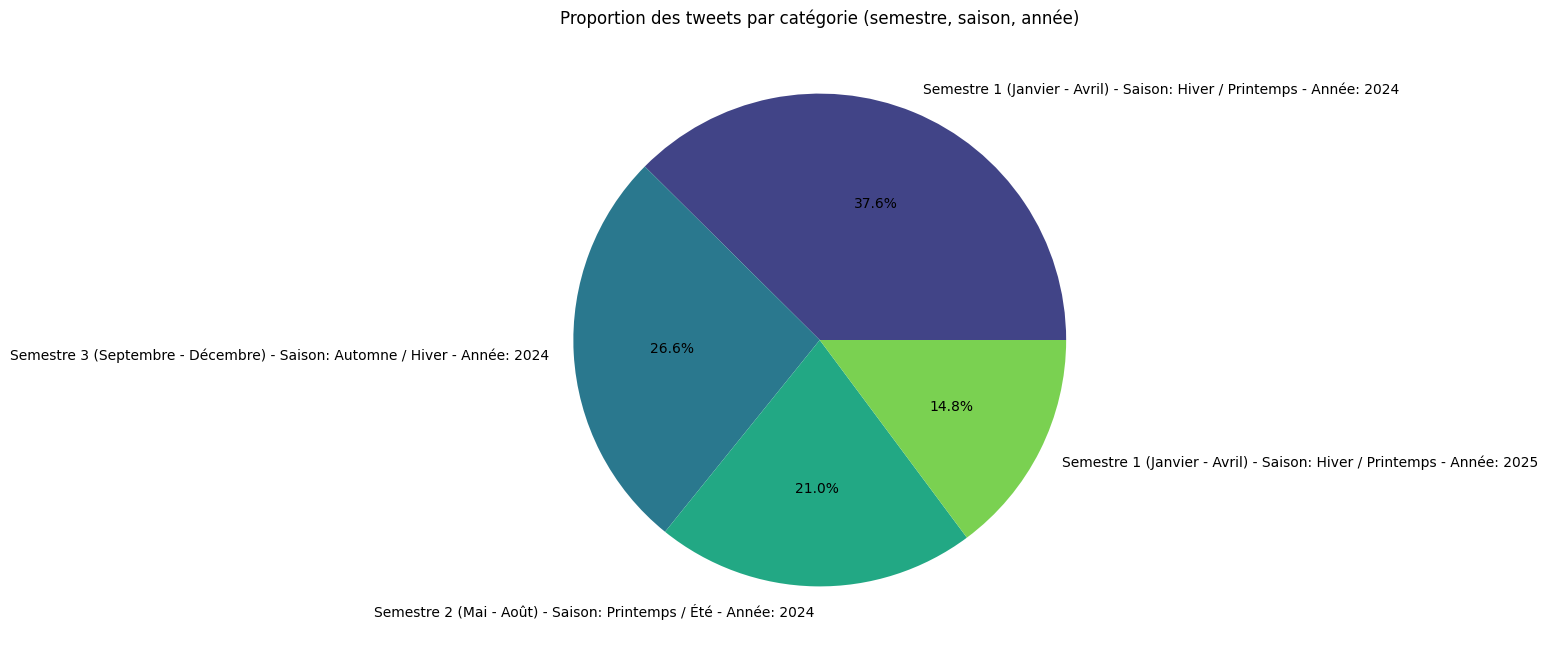

In [90]:

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

df['year'] = pd.to_datetime(df['created_at'], errors='coerce').dt.year

df_filtered = df[df['year'] != 2023]

df_filtered['semestre_saison_année'] = df_filtered['semestre_saison'] + " - Année: " + df_filtered['year'].astype(str)

category_counts = df_filtered['semestre_saison_année'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xlabel("Catégorie (Semestre / Saison / Année)")
plt.ylabel("Nombre de tweets")
plt.xticks(rotation=45, ha='right')
plt.title("Répartition des tweets par catégorie (semestre, saison, année)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title("Proportion des tweets par catégorie (semestre, saison, année)")
plt.show()


In [91]:

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

df = pd.read_csv('../Data/data_cleaned_with_analysis.csv')

analyzer = SentimentIntensityAnalyzer()

def calculate_severity_with_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    
    compound_score = sentiment_score['compound']
    
    if compound_score <= -0.5:
        return 3
    elif compound_score <= -0.2:
        return 2
    else:
        return 1

df['severity_score'] = df['full_text'].apply(calculate_severity_with_sentiment)

df.to_csv('../Data/tweets_categorises_with_sentiment_severity.csv', index=False)

print("Mise à jour terminée : colonne 'severity_score' basée sur l'analyse de sentiment ajoutée.")


Mise à jour terminée : colonne 'severity_score' basée sur l'analyse de sentiment ajoutée.


C:\Users\rakot\AppData\Local\Temp\ipykernel_36228\3064162066.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')


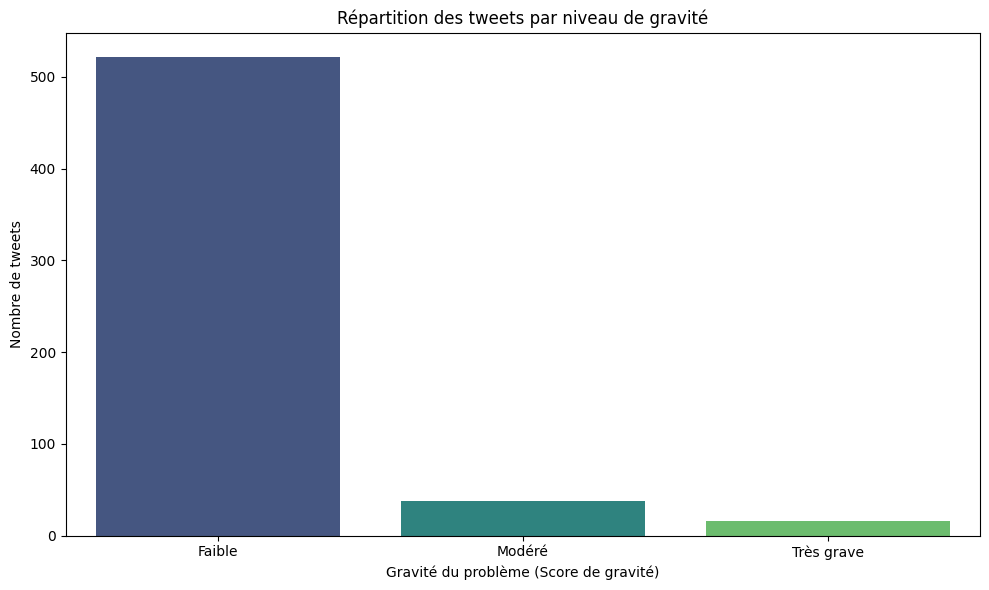

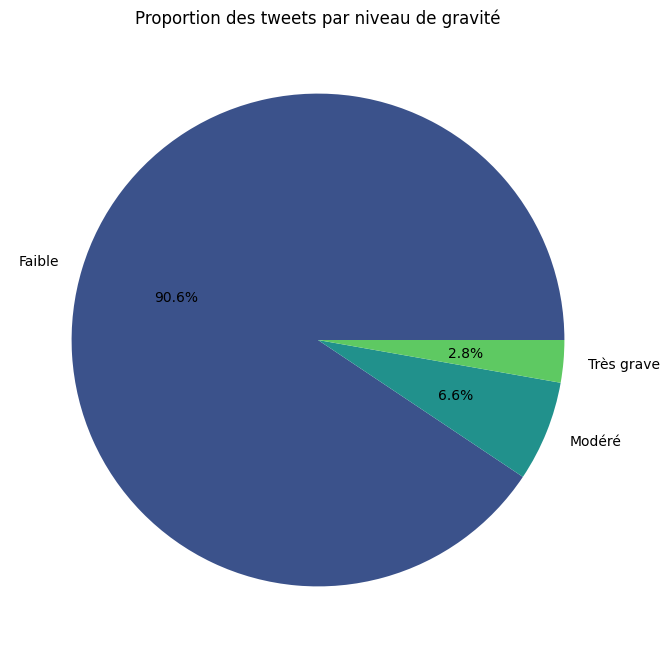

In [92]:

df = pd.read_csv('../Data/tweets_categorises_with_sentiment_severity.csv')

severity_counts = df['severity_score'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')
plt.xlabel("Gravité du problème (Score de gravité)")
plt.ylabel("Nombre de tweets")
plt.title("Répartition des tweets par niveau de gravité")
plt.xticks([0, 1, 2], ['Faible', 'Modéré', 'Très grave'], rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.pie(severity_counts, labels=['Faible', 'Modéré', 'Très grave'], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(severity_counts)))
plt.title("Proportion des tweets par niveau de gravité")
plt.show()

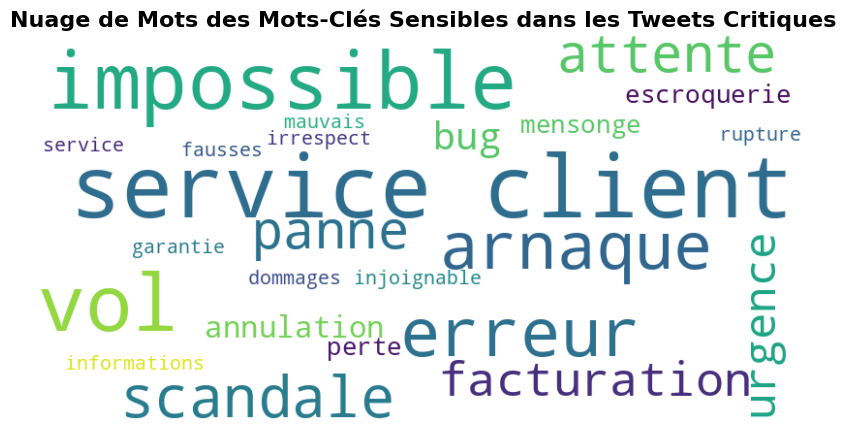

In [3]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv("../Data/data_with_critical_keywords_and_discomfort.csv")

# Liste des mots-clés sensibles
mots_cles_sensibles = [
    "délai", "panne", "urgence", "scandale", "problème", "erreur", "bug", "interruption",
    "mauvais service", "incident", "disponibilité", "défaillance", "non-réponse", "injoignable",
    "retard", "annulation", "indisponibilité", "difficulté", "absence", "injustifié", "non-résolu",
    "échec", "dommages", "coût", "facturation", "prélèvement", "mauvaise communication", 
    "impossible", "perte", "arnaque", "mécontentement", "désagrément", "mauvaise expérience", 
    "déception", "insatisfaction", "service client", "délais", "rupture", "problèmes techniques", 
    "absence de réponse", "non-gestion", "résolution", "garantie", "inefficacité", "défectueux", 
    "manque d'information", "vol", "escroquerie", "mensonge", "non-remboursement", "insécurité",
    "retour impossible", "rejet", "dépannage", "réclamation", "non-conforme", "mauvaise qualité",
    "discrimination", "perte de connexion", "mauvaise gestion", "incapacité", "attente", "service déplorable",
    "problème de connexion", "non-contrat", "fausses informations", "désactivation", "problème de facturation",
    "mauvaise manipulation", "incompétence", "expérience négative", "irrespect", "non-respect", "injustices"
]

# Filtrer les tweets contenant des mots-clés sensibles dans la catégorie 'full_text'
tweets_critiques = df[df['full_text'].str.contains('|'.join(mots_cles_sensibles), case=False, na=False)]

# Extraire les mots-clés sensibles des tweets critiques
words_filtered = []

for text in tweets_critiques['full_text'].dropna():
    for mot in mots_cles_sensibles:
        if mot.lower() in text.lower():
            words_filtered.append(mot)

# Créer un texte combiné avec les mots-clés sensibles
filtered_text = ' '.join(words_filtered)

# Générer le nuage de mots avec uniquement les mots-clés sensibles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de Mots des Mots-Clés Sensibles dans les Tweets Critiques", fontsize=16, fontweight="bold")
plt.show()


In [8]:
import pandas as pd
import plotly.express as px

# Charger les données
df = pd.read_csv("../Data/data_with_critical_keywords_and_discomfort.csv")

# Filtrer les données pour supprimer les valeurs nulles ou égales à 0 dans 'degree_of_discomfort'
df_filtered = df[df['degree_of_discomfort'].notnull() & (df['degree_of_discomfort'] > 0)]

# Créer l'histogramme avec Plotly
fig = px.histogram(df_filtered, 
                   x='degree_of_discomfort', 
                   nbins=20,  # Ajuster le nombre de bacs pour l'histogramme
                   title="Histogramme des Scores d'Inconfort Client",
                   labels={'degree_of_discomfort': 'Score d\'Inconfort (%)'})

# Mettre à jour les couleurs du graphique
fig.update_traces(marker=dict(color=df_filtered['degree_of_discomfort'], 
                              colorscale='Viridis'))

# Afficher le graphique avec un fond plus clair et une taille réduite
fig.update_layout(
    xaxis_title="Score d'Inconfort (%)",
    yaxis_title="Fréquence",
    bargap=0.2,  # Espacement entre les barres
    template="plotly",  # Thème plus clair
    width=800,  # Largeur du graphique
    height=500  # Hauteur du graphique
)

fig.show()


In [23]:
import pandas as pd
import plotly.express as px

# Charger les données
df = pd.read_csv("../data/data_with_critical_keywords_and_discomfort.csv")

# Dictionnaire de pondération pour les types de problèmes (en minuscules)
pondération_problème = {
    "panne": 80,
    "arnaque": 90,
    "attente": 60,
    "retard": 70,
    "problème de facturation": 75,
    "escroquerie": 85,
    "erreur": 65,
    "service client": 70,
    "scandale": 95,
    "mauvaise qualité": 80,
    "problèmes techniques": 85,
    "indisponibilité": 75,
    "rupture de stock": 70,
    "non-réponse": 85,
    "annulation": 80,
    "défaillance": 90,
    "délai": 65,
    "mauvaise communication": 70,
    "inaccessibilité": 80,
    "retour impossible": 75,
    "non-remboursement": 90,
    "déconnexion": 80,
    "fausses informations": 85,
    "problème de connexion": 80,
    "inefficacité": 75,
    "problème de livraison": 85,
    "réclamation non traitée": 90,
    "garantie non respectée": 85,
    "manque d'information": 70,
    "vol": 95,
    "disponibilité réduite": 80,
    "incapacité de contact": 85,
    "incompétence": 90,
    "désagrément": 75,
    "insatisfaction": 80,
    "problème d'accès": 70,
    "absence de solution": 90,
    "expérience négative": 85,
    "problème de paiement": 80,
    "mauvaise gestion": 85,
    "démarchage abusif": 90,
    "escroquerie en ligne": 95,
    "service déplorable": 90,
    "annulation de commande": 85,
    "non-conformité": 90,
    "mensonge": 90,
    "injustices": 95,
    "manque de réactivité": 75,
    "problème de stockage": 80,
    "perte de données": 90,
    "mauvaise expérience utilisateur": 85,
    "erreur système": 80,
    "problème de sécurité": 95,
    "irrespect": 85,
    "problème de commande": 75,
    "mauvaise explication": 70,
    "violence verbale": 90,
    "problème d'intervention": 80,
    "désactivation": 85,
    "service saturé": 75,
    "annulation de réservation": 80,
    "injustice": 90
}

# Dictionnaire de pondération des sentiments
pondération_sentiment = {
    "positive": 10,
    "negative": 90,
    "neutral": 50
}

# Fonction pour calculer le score d'inconfort
def calculer_inconfort(tweet, sentiment):
    score_inconfort = 0
    
    # Recherche des mots-clés de problème dans le tweet et ajustement du score
    score_inconfort += sum(pondération_problème.get(problème, 0) for problème in pondération_problème if problème in tweet.lower())
    
    # Appliquer la pondération du sentiment
    score_inconfort *= pondération_sentiment.get(sentiment, 50) / 100

    return score_inconfort

# Convertir les valeurs de 'sentiment_class' en minuscules
df['sentiment_class'] = df['sentiment_class'].str.lower()

# Appliquer la fonction pour calculer l'inconfort
df['inconfort'] = df.apply(lambda row: calculer_inconfort(row['full_text'], row['sentiment_class']), axis=1)

# Filtrer les valeurs nulles ou égales à 0 dans 'inconfort'
df_filtered = df[df['inconfort'].notnull() & (df['inconfort'] > 0)]

# Sauvegarder les résultats dans un nouveau fichier CSV
df.to_csv("../data/data_with_critical_keywords_and_discomfort_with_inconfort.csv", index=False)

# Créer un histogramme avec Plotly
fig = px.histogram(df_filtered, 
                   x='inconfort', 
                   nbins=20,  # Ajuster le nombre de bacs pour l'histogramme
                   title="Histogramme des Scores d'Inconfort Client",
                   labels={'inconfort': 'Score d\'Inconfort (%)'})

# Mettre à jour les couleurs du graphique avec une palette différente
fig.update_traces(marker=dict(color=df_filtered['inconfort'], 
                              colorscale='Plasma'))  # Changer la palette à "Plasma"

# Afficher le graphique
fig.update_layout(
    xaxis_title="Score d'Inconfort (%)",
    yaxis_title="Fréquence",
    bargap=0.2,  # Espacement entre les barres
    template="plotly",  # Thème Plotly
    width=800,  # Largeur du graphique
    height=500  # Hauteur du graphique
)

fig.show()


In [21]:
import pandas as pd
import plotly.express as px

# Charger les données
df = pd.read_csv("../data/data_with_critical_keywords_and_discomfort.csv")

# Calculer la moyenne du degré d'inconfort par statut d'urgence
df_avg = df.groupby('urgence_status')['degree_of_discomfort'].mean().reset_index()

# Créer un bar chart pour la moyenne du 'degree_of_discomfort' par 'urgence_status'
fig = px.bar(df_avg, 
             x='urgence_status', 
             y='degree_of_discomfort', 
             title="Moyenne du Degré d'Inconfort par Statut d'Urgence",
             labels={'degree_of_discomfort': 'Moyenne du Degré d\'Inconfort', 'urgence_status': 'Statut d\'Urgence'},
             color='urgence_status',  # Couleur par urgence
             color_discrete_map={"Urgence": "red", "Pas Urgence": "blue"})  # Couleur manuelle

# Afficher le graphique
fig.update_layout(
    xaxis_title="Statut d'Urgence",
    yaxis_title="Moyenne du Degré d'Inconfort",
    template="plotly",  # Thème Plotly
    width=800,  # Largeur du graphique
    height=500  # Hauteur du graphique
)

fig.show()


In [26]:
import pandas as pd
import plotly.express as px

# Charger les données
df = pd.read_csv("../data/data_with_critical_keywords_and_discomfort.csv")

# Dictionnaire de pondération pour les types de problèmes (en minuscules)
pondération_problème = {
    "panne": 80,
    "arnaque": 90,
    "attente": 60,
    "retard": 70,
    "problème de facturation": 75,
    "escroquerie": 85,
    "erreur": 65,
    "service client": 70,
    "scandale": 95,
    "mauvaise qualité": 80,
    "problèmes techniques": 85,
    "indisponibilité": 75,
    "rupture de stock": 70,
    "non-réponse": 85,
    "annulation": 80,
    "défaillance": 90,
    "délai": 65,
    "mauvaise communication": 70,
    "inaccessibilité": 80,
    "retour impossible": 75,
    "non-remboursement": 90,
    "déconnexion": 80,
    "fausses informations": 85,
    "problème de connexion": 80,
    "inefficacité": 75,
    "problème de livraison": 85,
    "réclamation non traitée": 90,
    "garantie non respectée": 85,
    "manque d'information": 70,
    "vol": 95,
    "disponibilité réduite": 80,
    "incapacité de contact": 85,
    "incompétence": 90,
    "désagrément": 75,
    "insatisfaction": 80,
    "problème d'accès": 70,
    "absence de solution": 90,
    "expérience négative": 85,
    "problème de paiement": 80,
    "mauvaise gestion": 85,
    "démarchage abusif": 90,
    "escroquerie en ligne": 95,
    "service déplorable": 90,
    "annulation de commande": 85,
    "non-conformité": 90,
    "mensonge": 90,
    "injustices": 95,
    "manque de réactivité": 75,
    "problème de stockage": 80,
    "perte de données": 90,
    "mauvaise expérience utilisateur": 85,
    "erreur système": 80,
    "problème de sécurité": 95,
    "irrespect": 85,
    "problème de commande": 75,
    "mauvaise explication": 70,
    "violence verbale": 90,
    "problème d'intervention": 80,
    "désactivation": 85,
    "service saturé": 75,
    "annulation de réservation": 80,
    "injustice": 90
}

# Dictionnaire de pondération des sentiments
pondération_sentiment = {
    "positive": 10,
    "negative": 90,
    "neutral": 50
}

# Fonction pour calculer le score d'inconfort
def calculer_inconfort(tweet, sentiment):
    score_inconfort = 0
    
    # Recherche des mots-clés de problème dans le tweet et ajustement du score
    score_inconfort += sum(pondération_problème.get(problème, 0) for problème in pondération_problème if problème in tweet.lower())
    
    # Appliquer la pondération du sentiment
    score_inconfort *= pondération_sentiment.get(sentiment, 50) / 100

    return score_inconfort

# Convertir les valeurs de 'sentiment_class' en minuscules
df['sentiment_class'] = df['sentiment_class'].str.lower()

# Appliquer la fonction pour calculer l'inconfort
df['inconfort'] = df.apply(lambda row: calculer_inconfort(row['full_text'], row['sentiment_class']), axis=1)

# Filtrer les valeurs nulles ou égales à 0 dans 'inconfort'
df_filtered = df[df['inconfort'].notnull() & (df['inconfort'] > 0)]

# Normaliser la colonne 'inconfort' pour avoir des valeurs comprises entre 0 et 1
df_filtered['inconfort_normalized'] = (df_filtered['inconfort'] - df_filtered['inconfort'].min()) / (df_filtered['inconfort'].max() - df_filtered['inconfort'].min())

# Créer un box plot avec Plotly
fig = px.box(df_filtered, 
             y='inconfort', 
             color='inconfort_normalized',  # Couleur basée sur la colonne normalisée
             title="Box Plot des Scores d'Inconfort Client",
             labels={'inconfort': 'Score d\'Inconfort (%)'},
             color_continuous_scale='Viridis')  # Appliquer directement la palette "Viridis"

# Afficher le graphique
fig.update_layout(
    yaxis_title="Score d'Inconfort (%)",
    template="plotly",  # Thème Plotly
    width=800,  # Largeur du graphique
    height=500  # Hauteur du graphique
)

fig.show()


C:\Users\rakot\AppData\Local\Temp\ipykernel_28008\513754038.py:102: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: box() got an unexpected keyword argument 'color_continuous_scale'